## MDS202251 Varun Agrawal Assignment 6
#### Question 1

In [73]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import math
from itertools import accumulate
from typing import Union
from scipy.signal import convolve2d
from scipy.fft import fft2, fftshift

In [74]:
chkrb = cv2.imread('checkerboard.png', 0)
image = chkrb

In [75]:
print(image.shape)

(200, 200)


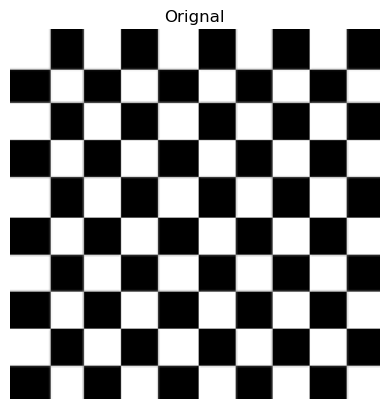

In [76]:
plt.imshow(image, cmap ='gray')
plt.axis('off')
plt.title('Orignal')
plt.show()

In [77]:
def add_gaussian_noise(image, mean=0, variance=1000):
    sigma = variance ** 0.5
    gauss = np.random.normal(mean, sigma, image.shape).astype(np.float32)  # Generating noise for a single channel
    noisy_image =  np.clip(image + gauss, 0, 255).astype(np.uint8)  # Adding channel dimension
    return noisy_image.astype(np.uint8)


def add_salt_and_pepper_noise(image, salt_prob=0.015, pepper_prob=0.015):
    row, col = image.shape[:2]
    noisy_image = np.copy(image)
    # Salt mode
    num_salt = int(np.ceil(salt_prob * image.size))
    salt_coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255
    # Pepper mode
    num_pepper = int(np.ceil(pepper_prob * image.size))
    pepper_coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0
    return noisy_image

def add_periodic_noise(image, strength=80, frequency=0.4, angle=30):
    rows, cols = image.shape
    x = np.arange(cols)
    y = np.arange(rows)
    X, Y = np.meshgrid(x, y)
    
    noise = np.sin(2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) * frequency)

    # Clip the noise to ensure it stays within the valid range
    noisy_image = (image + strength * noise)
    return noisy_image.astype(np.float32)



In [78]:
# Add noise to the image
noisy_gaussian = add_gaussian_noise(image)
noisy_salt_and_pepper = add_salt_and_pepper_noise(image)
noisy_periodic = add_periodic_noise(image)

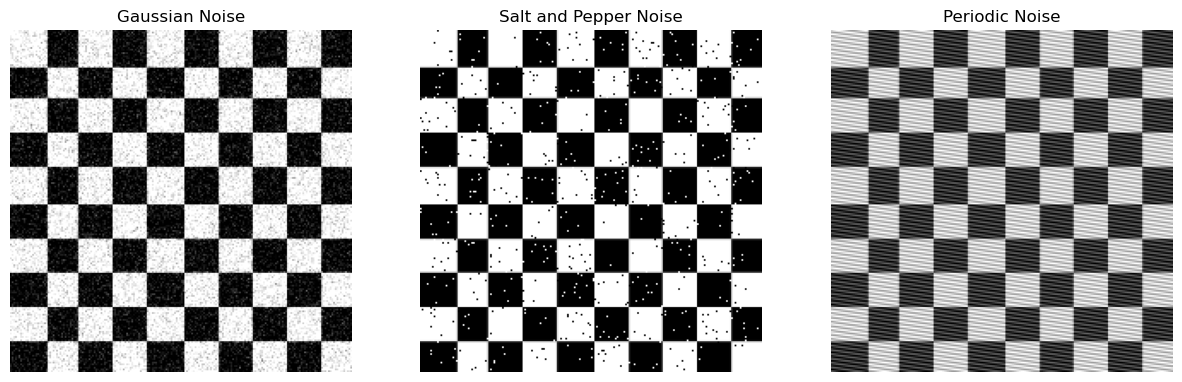

In [79]:
images = [noisy_gaussian, noisy_salt_and_pepper, noisy_periodic]
titles = ["Gaussian Noise", "Salt and Pepper Noise", "Periodic Noise"]

# Set up a subplot grid with one row and the number of images as columns
plt.figure(figsize=(15, 5)) 
for i, (img, title) in enumerate(zip(images, titles), 1):
    plt.subplot(1, len(images), i)  # Subplot index starts from 1
    plt.imshow(img, cmap='gray')  # Specify cmap='gray' for grayscale images
    plt.title(title)
    plt.axis('off')

plt.show()

In [80]:
# Denoise using Gaussian filter
denoised_gaussian = cv2.GaussianBlur(noisy_gaussian, (5, 5), 5)
denoised_salt_and_pepper = cv2.GaussianBlur(noisy_salt_and_pepper, (5, 5), 5)
denoised_periodic = cv2.GaussianBlur(noisy_periodic, (5, 5), 5)

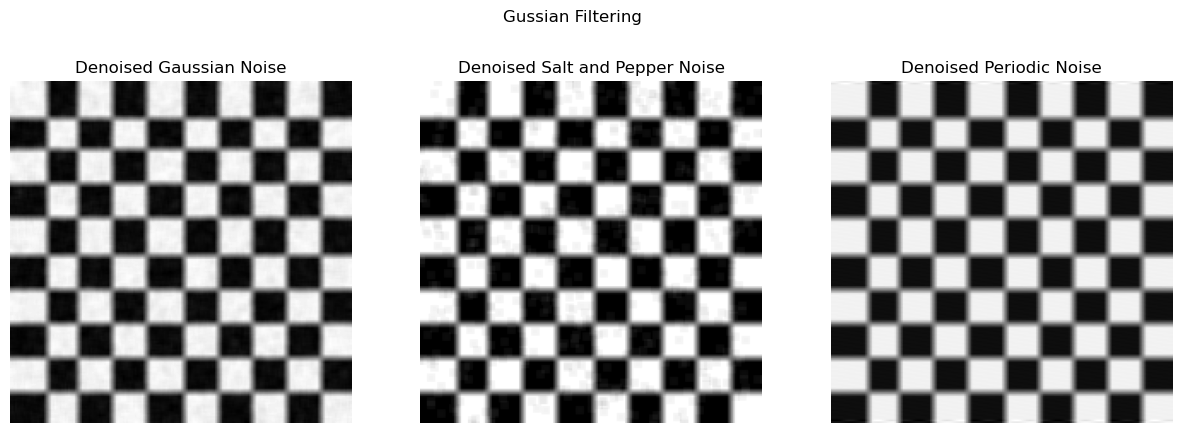

In [81]:
# Display the images
plt.figure(figsize=(15, 5))
plt.suptitle("Gussian Filtering")
plt.subplot(1, 3, 1)
plt.imshow(denoised_gaussian, cmap='gray')
plt.title('Denoised Gaussian Noise')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(denoised_salt_and_pepper, cmap='gray')
plt.title('Denoised Salt and Pepper Noise')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(denoised_periodic, cmap='gray')
plt.title('Denoised Periodic Noise')
plt.axis('off')

plt.show()

In [82]:
# Denoise using Median filter
denoised_gaussian = cv2.medianBlur(noisy_gaussian, 5)
denoised_salt_and_pepper = cv2.medianBlur(noisy_salt_and_pepper, 5)
denoised_periodic = cv2.medianBlur(noisy_periodic, 5)

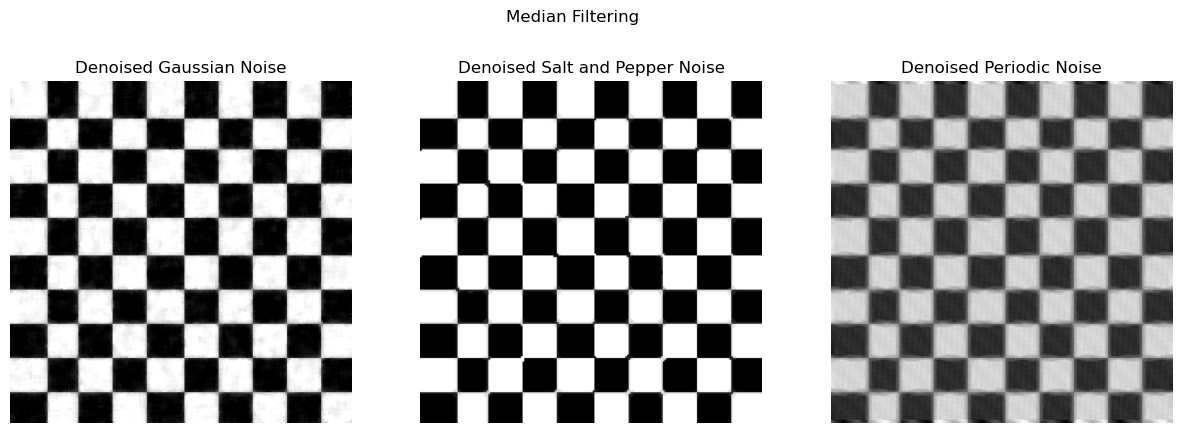

In [83]:
# Display the images
plt.figure(figsize=(15, 5))
plt.suptitle("Median Filtering")

plt.subplot(1, 3, 1)
plt.imshow(denoised_gaussian, cmap='gray')
plt.title('Denoised Gaussian Noise')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(denoised_salt_and_pepper, cmap='gray')
plt.title('Denoised Salt and Pepper Noise')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(denoised_periodic, cmap='gray')
plt.title('Denoised Periodic Noise')
plt.axis('off')

plt.show()

In [84]:
# Denoise using Box filter
denoised_gaussian = cv2.boxFilter(noisy_gaussian, -1, (5, 5))
denoised_salt_and_pepper = cv2.boxFilter(noisy_salt_and_pepper, -1, (5, 5))
denoised_periodic = cv2.boxFilter(noisy_periodic, -1, (5, 5))

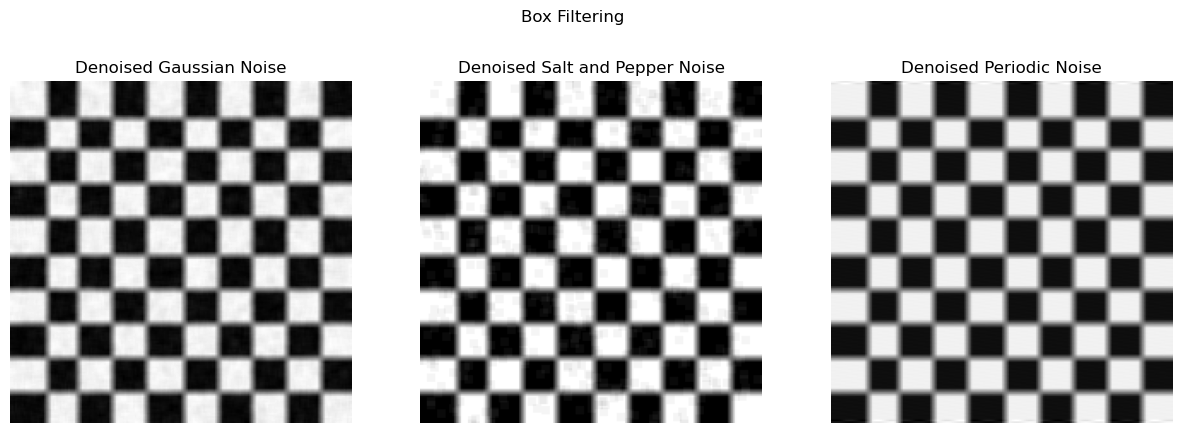

In [85]:
# Display the images
plt.figure(figsize=(15, 5))
plt.suptitle("Box Filtering")

plt.subplot(1, 3, 1)
plt.imshow(denoised_gaussian, cmap='gray')
plt.title('Denoised Gaussian Noise')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(denoised_salt_and_pepper, cmap='gray')
plt.title('Denoised Salt and Pepper Noise')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(denoised_periodic, cmap='gray')
plt.title('Denoised Periodic Noise')
plt.axis('off')

plt.show()

In [101]:
def plot_spectrum(image):
    # Calculate the Fourier transform of the image
    f_transform = fftshift(fft2(image))
    magnitude_spectrum = np.abs(f_transform)

    # Plot the original image
    plt.figure(figsize=(20,20))
    plt.subplot(121), plt.imshow(image, cmap='gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])

    # Plot the Fourier magnitude spectrum
    plt.subplot(122), plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
    plt.title('Fourier Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

    plt.show()

    return magnitude_spectrum

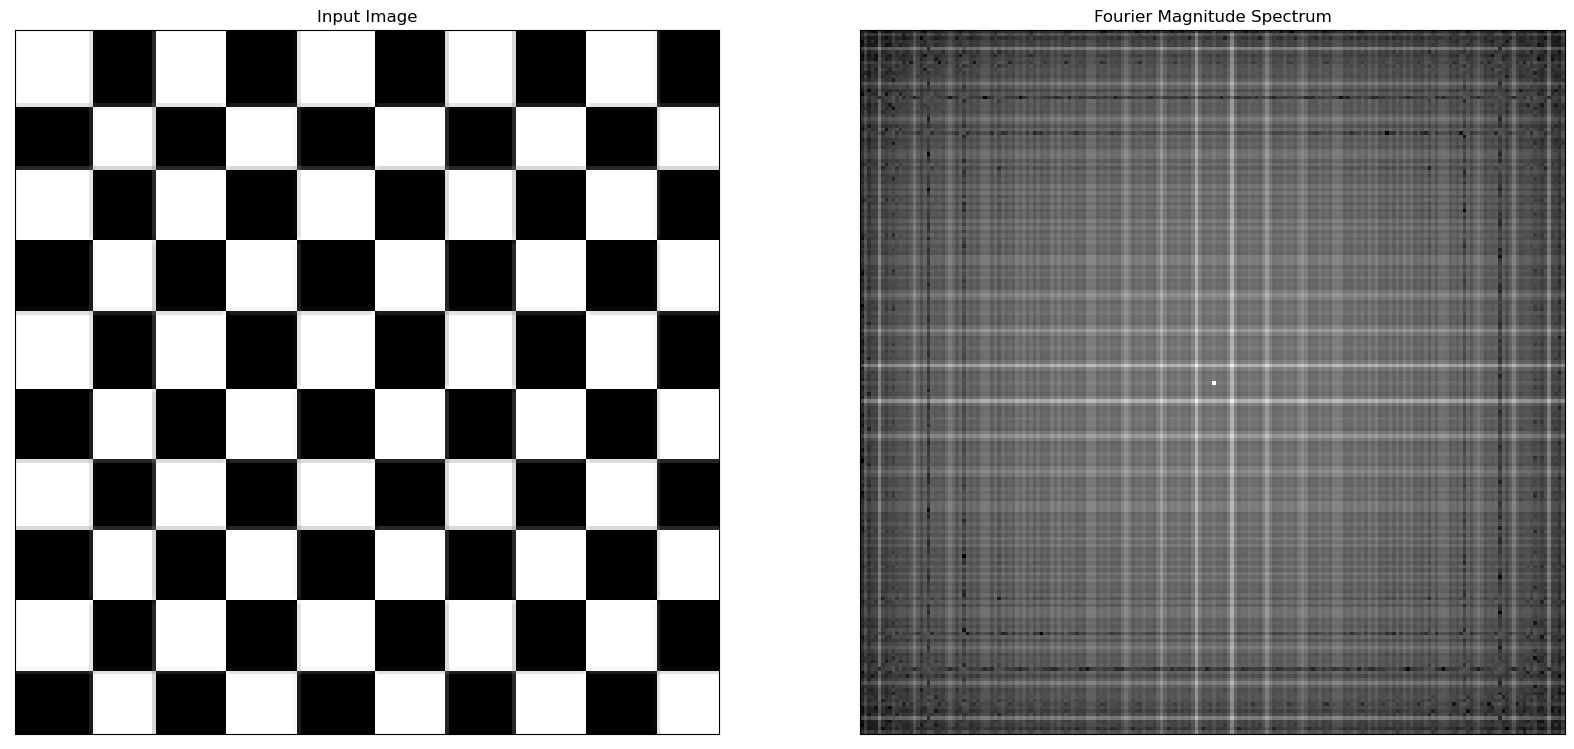

In [102]:
orig_spec = plot_spectrum(image)

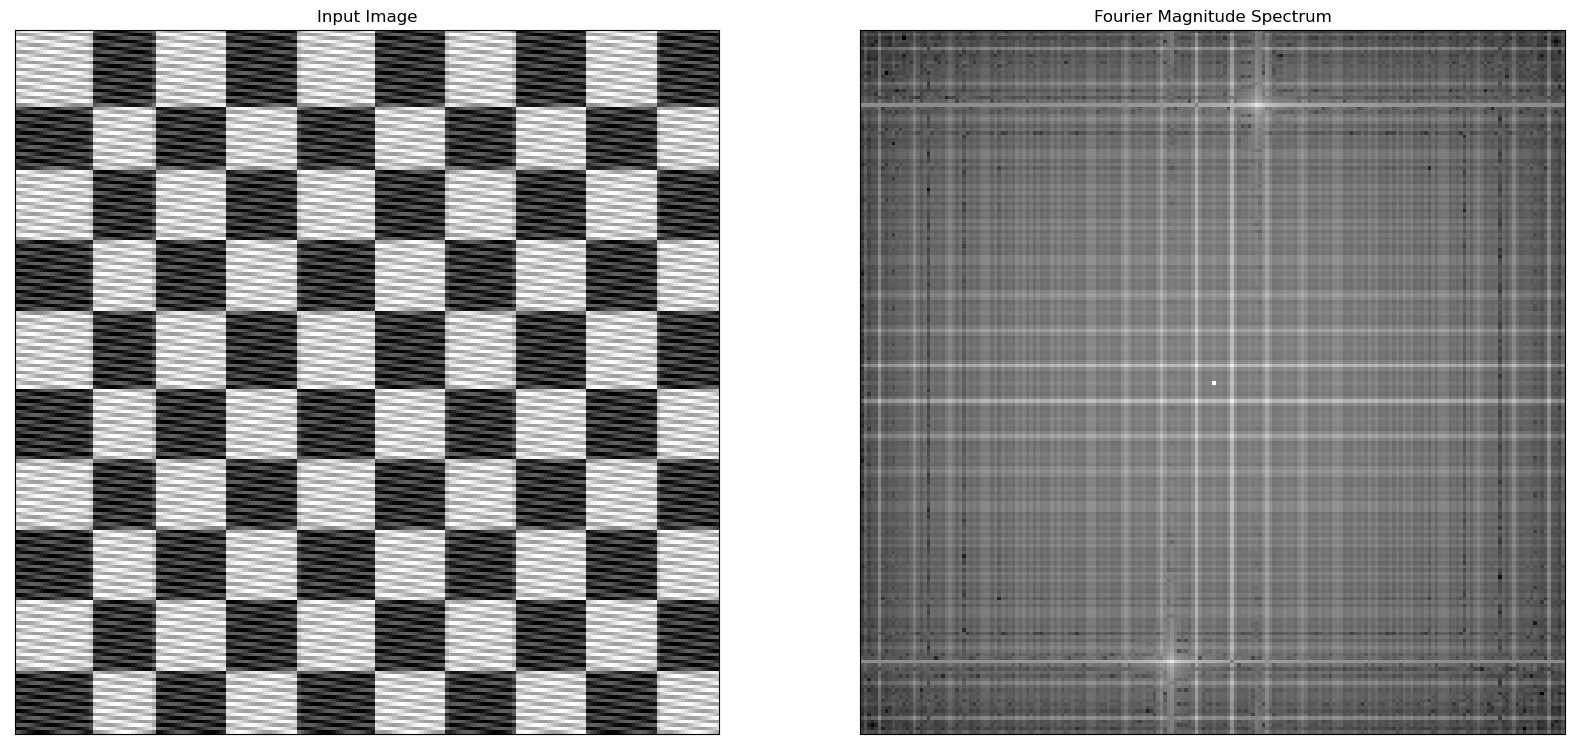

In [103]:
noise_spec = plot_spectrum(noisy_periodic)

In [116]:
def get_point_coordinates(image, i):
    coor_image = image.copy()
    points = []
    def click_event(event, x, y, flags, params):
        if event == cv2.EVENT_LBUTTONDOWN:
            print(f'({x},{y})')
            points.append([x, y])
            cv2.circle(coor_image, (x, y), 3, (0, 255, 255), -1)
            cv2.putText(coor_image, f'({x},{y})', (x + 10, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
    cv2.namedWindow('Point Coordinates')
    cv2.setMouseCallback('Point Coordinates', click_event)
    while True:
        cv2.imshow('Point Coordinates', coor_image)
        k = cv2.waitKey(1)
        if len(points) >= i or k == i:
            break
    cv2.destroyAllWindows()
    # plt.imshow(coor_image, cmap='gray')
    # plt.axis('off')
    # plt.show()
    return points

In [117]:
im = cv2.normalize(noise_spec, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
p = get_point_coordinates(im,1)

(114,23)


In [91]:
def create_notch_filter(img, fn, points):
    M,N = img.shape[:2]
    H = np.ones((M, N))
    
    # calculate fft of image
    fshift = np.fft.fftshift(np.fft.fft2(img))
    dkpos = lambda i,j,k : np.sqrt((i-points[k,0])**2 + (j-points[k,1])**2)
    dkneg = lambda i,j,k : np.sqrt((i-M+points[k,0])**2 + (j-N+points[k,1])**2)
    
    for i in range(M):
        for j in range(N):
            for k in range(len(points)):
                H[i,j] *= fn(dkpos(i,j,k)) * fn(dkneg(i,j,k))
                
    out_fourier = fshift * H
    # plt.figure(figsize=(5,5))
    # plt.imshow(H, cmap = 'gray')
    
    return np.abs(np.fft.ifft2(out_fourier))


In [92]:
def butterworth_notch_filter(img, points, radius, n):
    
    fn = lambda x : 1/(1 + (radius/x) ** n) if x else 0
    
    return create_notch_filter(img, fn, points)


def gaussian_notch_filter(img, points, radius):
    
    fn = lambda x : 1-np.exp(-(x**2/(2 * radius**2)))
    
    return create_notch_filter(img, fn, points)

def ideal_notch_filter(img, points, radius):
    
    fn = lambda x: 1 if x>radius else 0
    
    return create_notch_filter(img, fn, points)

In [118]:
fil_img = ideal_notch_filter(noisy_periodic, np.array([[23,114]]), 10)

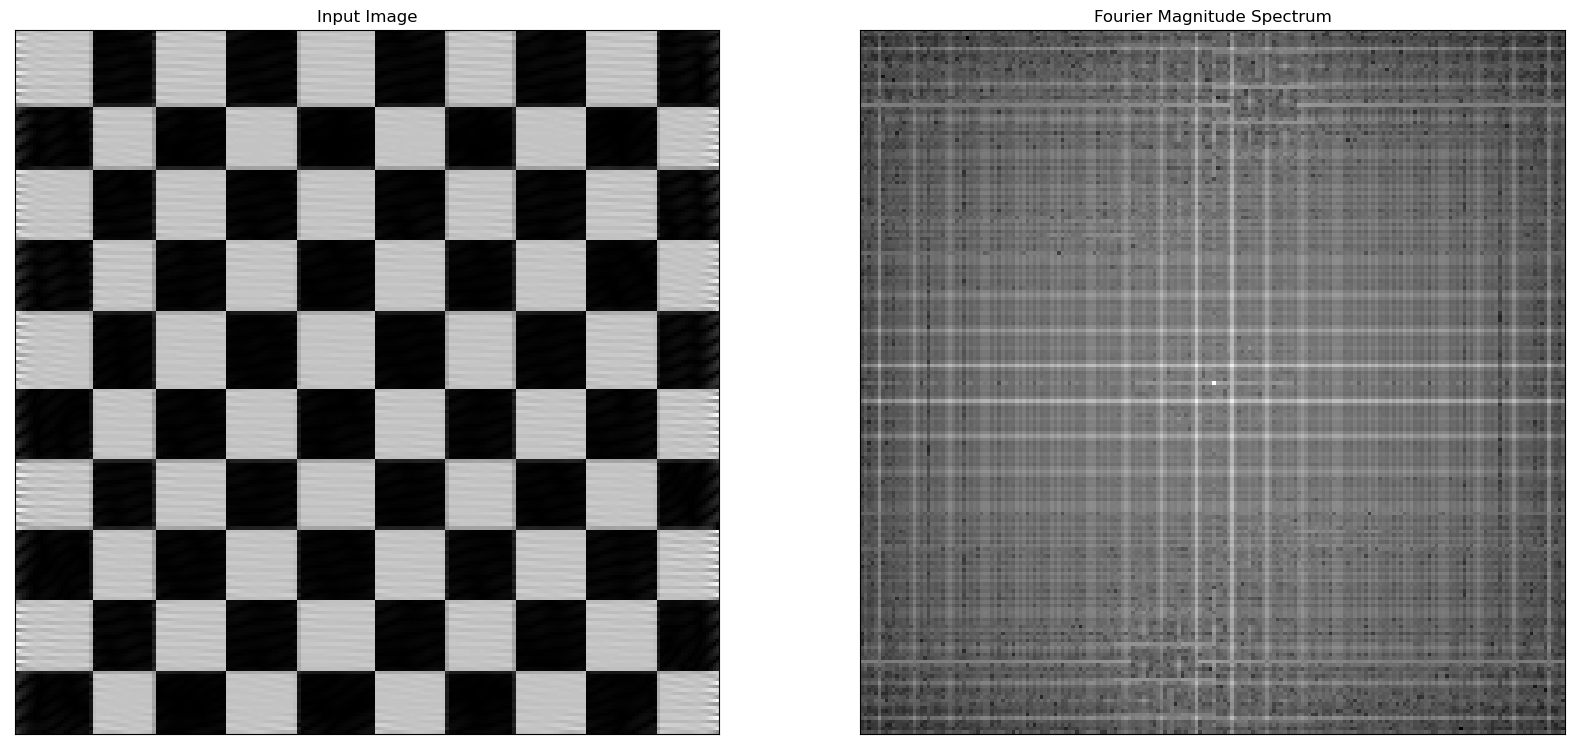

In [119]:
fil = plot_spectrum(fil_img)

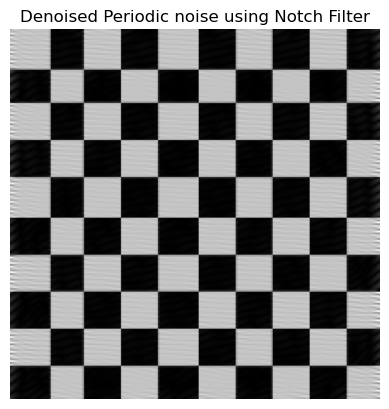

In [120]:
plt.imshow(fil_img, cmap='gray')
plt.title('Denoised Periodic noise using Notch Filter')
plt.axis('off')
plt.show()

Gaussian works best for Gaussian noise, Median fiter works best for salt and pepper while notch works for periodic noise 

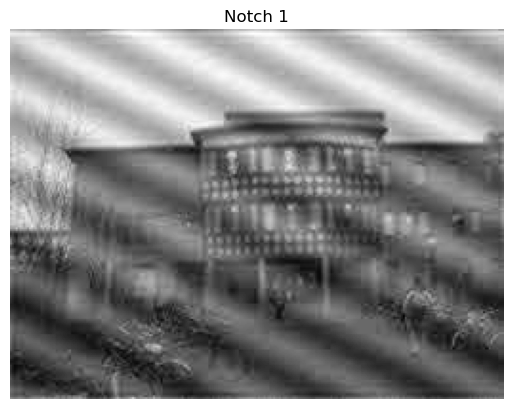

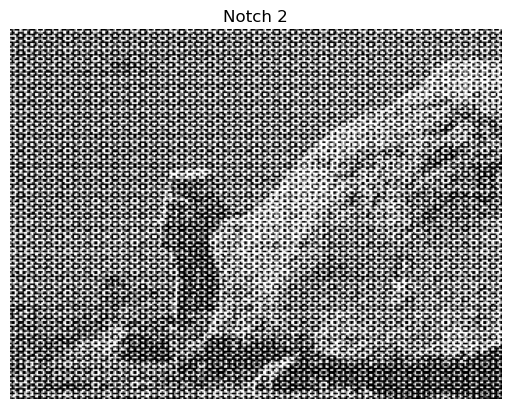

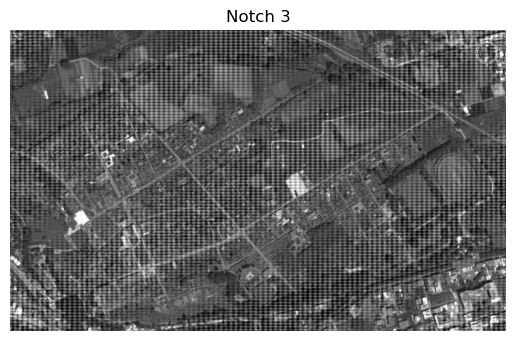

In [99]:
notch1 = cv2.imread('notch1.jpg',0)
notch2 = cv2.imread('notch2.png', 0)
notch3 = cv2.imread('notch3.jpg', 0)
plt.imshow(notch1, cmap ='gray')
plt.axis('off')
plt.title('Notch 1')
plt.show()
plt.imshow(notch2, cmap ='gray')
plt.axis('off')
plt.title('Notch 2')
plt.show()
plt.imshow(notch3, cmap ='gray')
plt.axis('off')
plt.title('Notch 3')
plt.show()

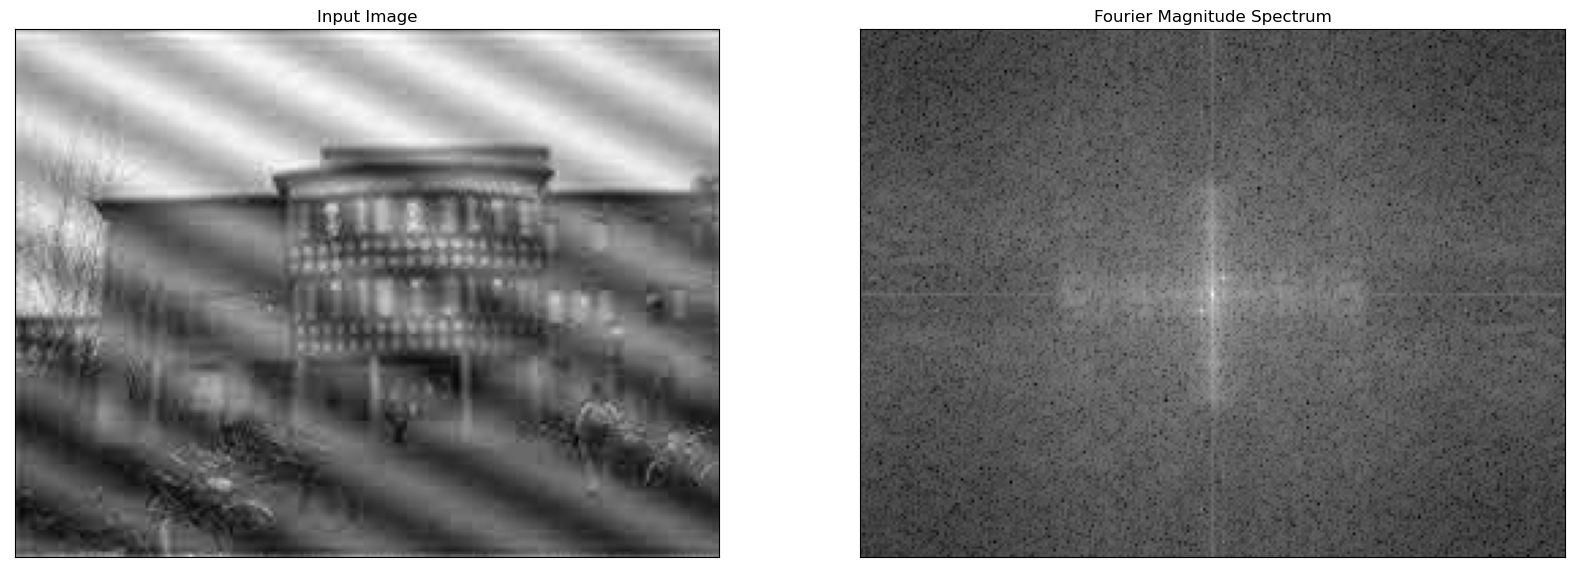

In [104]:
nt1 = plot_spectrum(notch1)

In [121]:
im = cv2.normalize(nt1, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
p = get_point_coordinates(im,1)

(125,103)


In [132]:
n1_fi = ideal_notch_filter(notch1, np.array([[103,125]]), 3)
n1_fb = butterworth_notch_filter(notch1, np.array([[103,125]]), 3, 2)
n1_fg = gaussian_notch_filter(notch1, np.array([[103,125]]), 3)

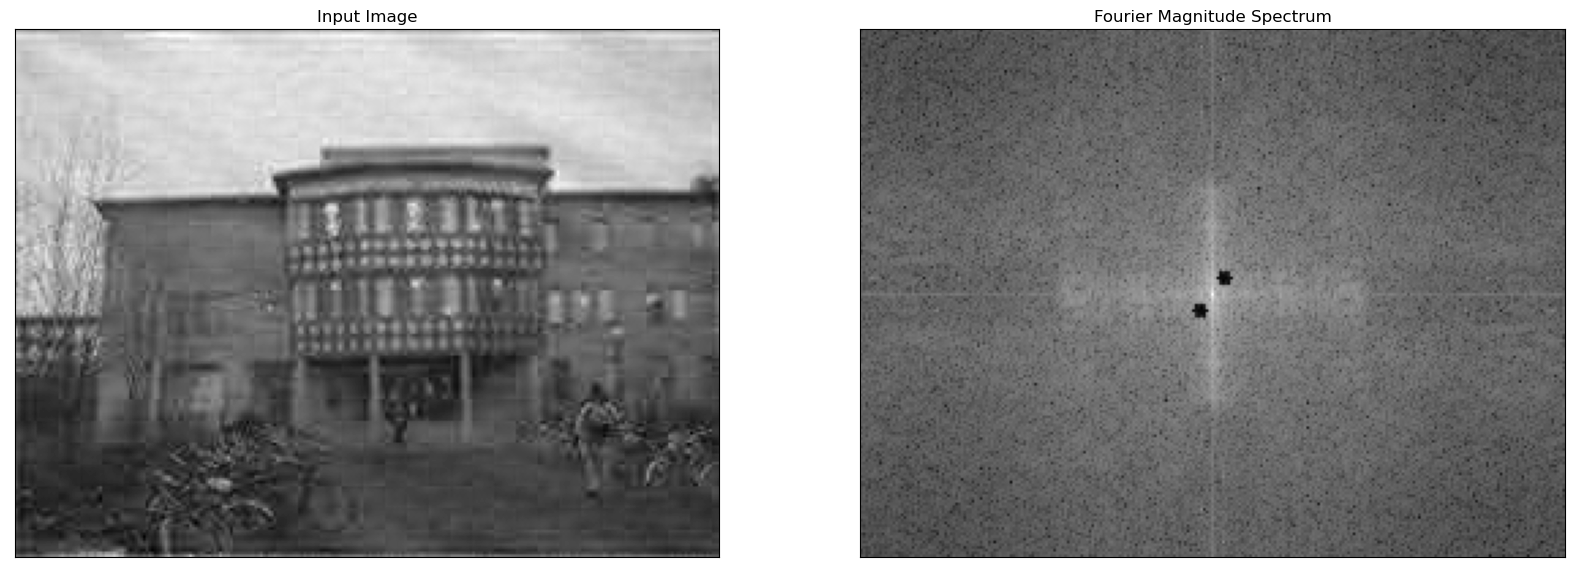

In [202]:
nt1_ = plot_spectrum(n1_fi)

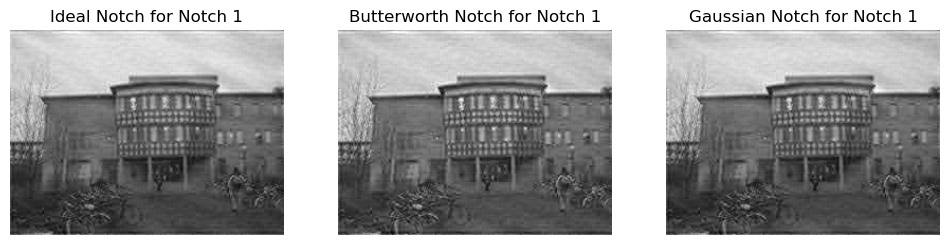

In [139]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Display each image on a separate subplot
axes[0].imshow(n1_fi, cmap='gray')
axes[0].set_title('Ideal Notch for Notch 1')
axes[0].axis('off')
axes[1].imshow(n1_fb, cmap='gray')
axes[1].set_title('Butterworth Notch for Notch 1')
axes[1].axis('off')
axes[2].imshow(n1_fg, cmap='gray')
axes[2].set_title('Gaussian Notch for Notch 1')
axes[2].axis('off')
plt.show()

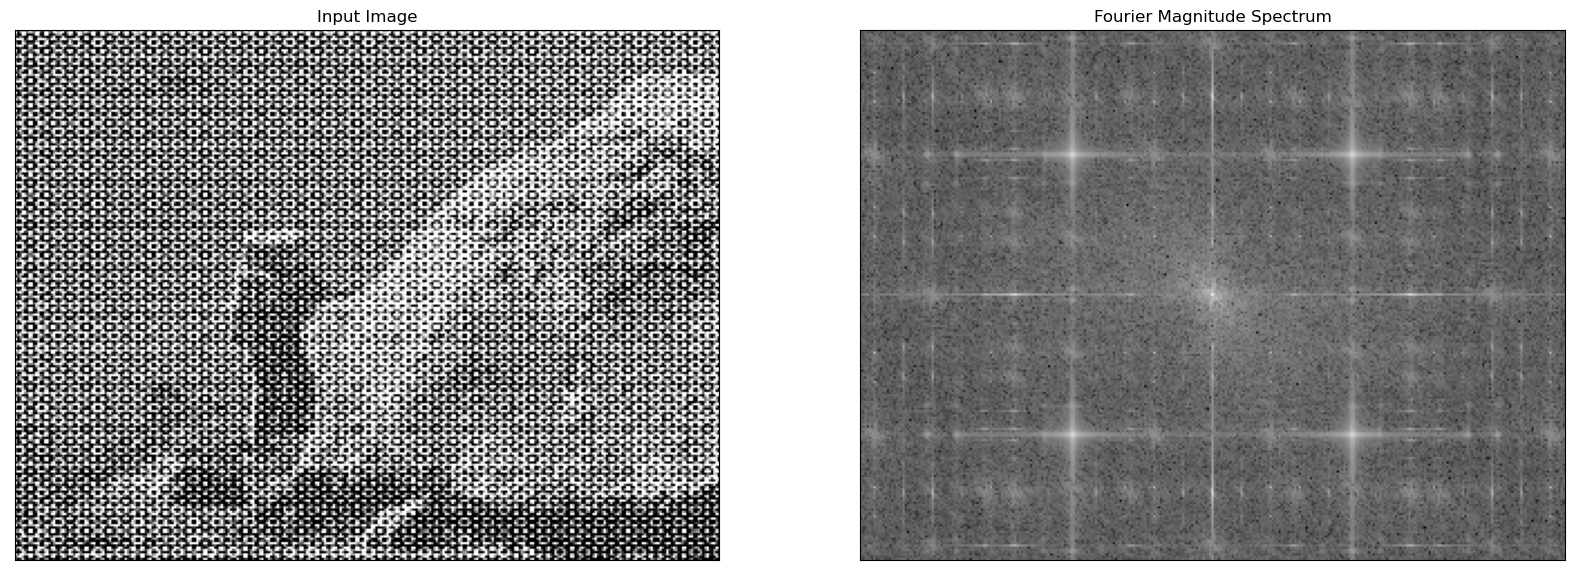

In [148]:
nt2 = plot_spectrum(notch2)

In [198]:
def find_bright_spots(img, rad):
    pts = []
        
    dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    magnitude_spectrum, _ = cv2.cartToPolar(dft_shift[:,:,0],dft_shift[:,:,1])

    magnitude_spectrum=np.log(20+magnitude_spectrum)
    for _ in range(25):
        max_idx = np.unravel_index(np.argmax(magnitude_spectrum), magnitude_spectrum.shape)
        
        pts.append(max_idx)
        x,y = max_idx
        
        for i in range(min(0, x-rad), max(img.shape[0],x+rad+1)):
            for j in range(min(0, y-rad), max(img.shape[0],y+rad+1)):
                if (i-x)**2+(j-y)**2 < rad**2:
                    magnitude_spectrum[i,j]=0
                    magnitude_spectrum[-i,-j]=0
                    
    return np.array(pts[1:])

In [199]:
pt = find_bright_spots(notch2, 6)

In [203]:
n2_fi = ideal_notch_filter(notch2, pt, 6)
n2_fb = butterworth_notch_filter(notch2, pt, 6, 2)
n2_fg = gaussian_notch_filter(notch2, pt, 6)

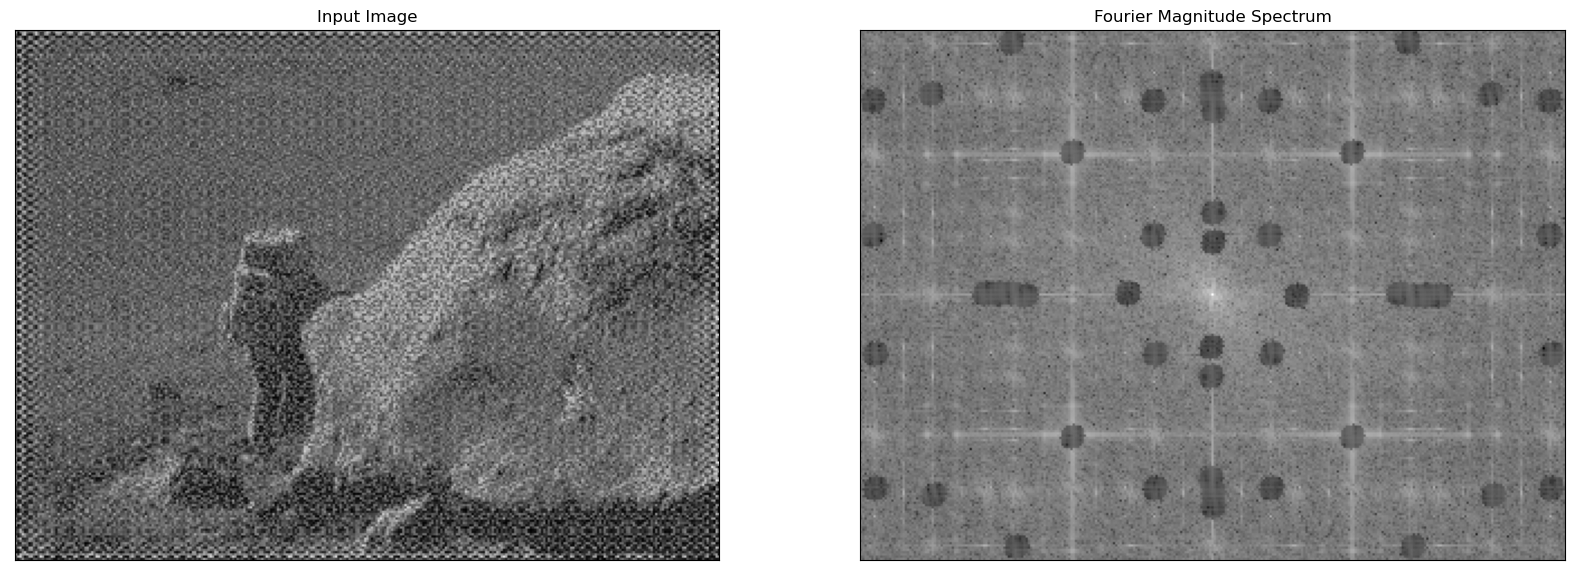

In [204]:
nt2_ = plot_spectrum(n2_fi)

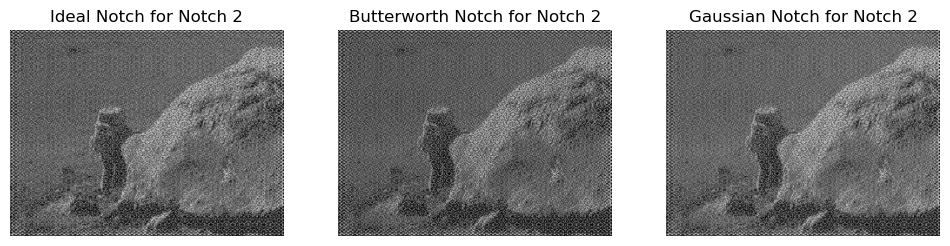

In [205]:
ptfig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Display each image on a separate subplot
axes[0].imshow(n2_fi, cmap='gray')
axes[0].set_title('Ideal Notch for Notch 2')
axes[0].axis('off')
axes[1].imshow(n2_fb, cmap='gray')
axes[1].set_title('Butterworth Notch for Notch 2')
axes[1].axis('off')
axes[2].imshow(n2_fg, cmap='gray')
axes[2].set_title('Gaussian Notch for Notch 2')
axes[2].axis('off')
plt.show()

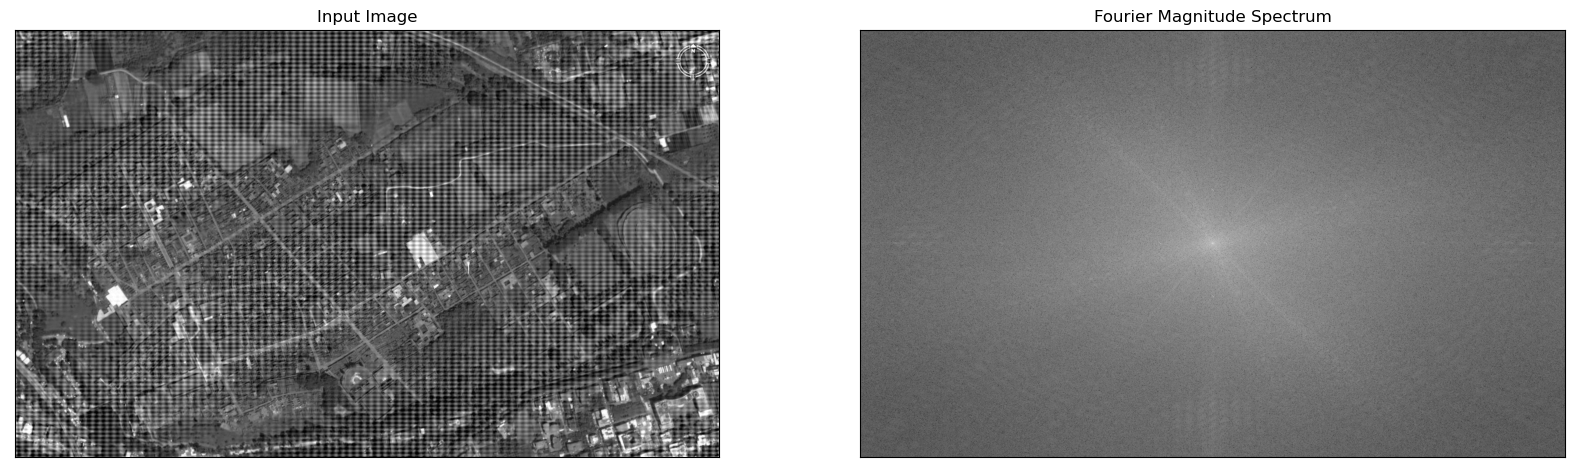

In [207]:
nt3 = plot_spectrum(notch3)

In [213]:
def find_bright_spots(img, rad):
    pts = []
        
    dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    magnitude_spectrum, _ = cv2.cartToPolar(dft_shift[:,:,0],dft_shift[:,:,1])

    magnitude_spectrum=np.log(20+magnitude_spectrum)
    for _ in range(7):
        max_idx = np.unravel_index(np.argmax(magnitude_spectrum), magnitude_spectrum.shape)
        
        pts.append(max_idx)
        x,y = max_idx
        
        for i in range(min(0, x-rad), max(img.shape[0],x+rad+1)):
            for j in range(min(0, y-rad), max(img.shape[0],y+rad+1)):
                if (i-x)**2+(j-y)**2 < rad**2:
                    magnitude_spectrum[i,j]=0
                    magnitude_spectrum[-i,-j]=0
                    
    return np.array(pts[1:])

In [214]:
pt = find_bright_spots(notch3, 4)

In [216]:
n3_fi = ideal_notch_filter(notch3, pt, 4)
n3_fb = butterworth_notch_filter(notch3, pt, 4, 2)
n3_fg = gaussian_notch_filter(notch3, pt, 4)

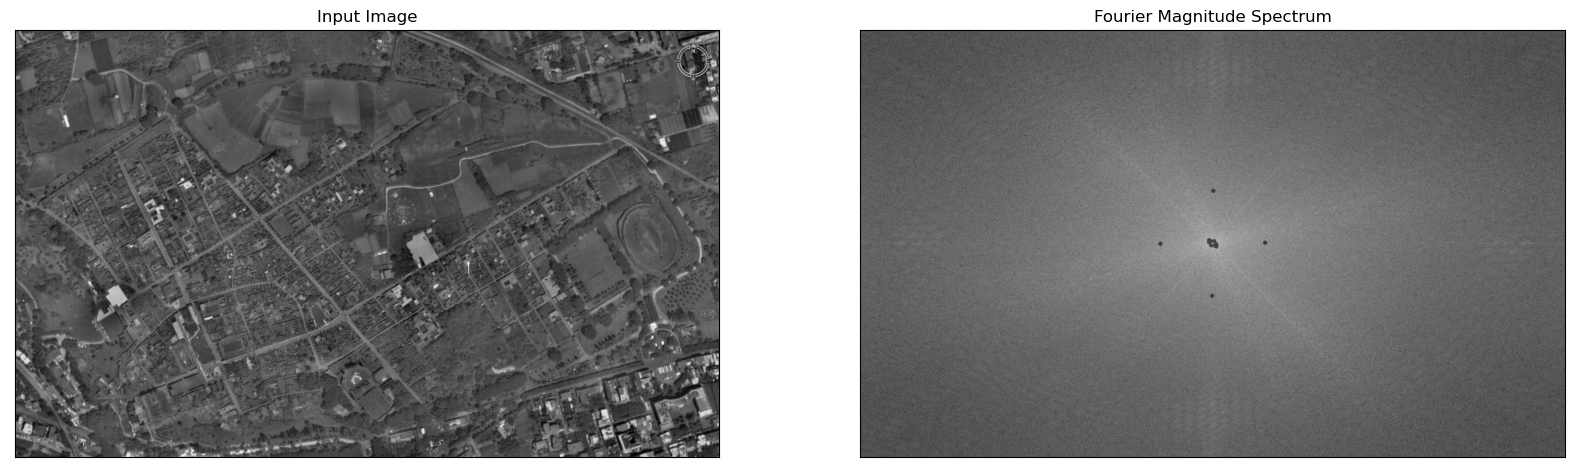

In [217]:
nt3_ = plot_spectrum(n3_fi)

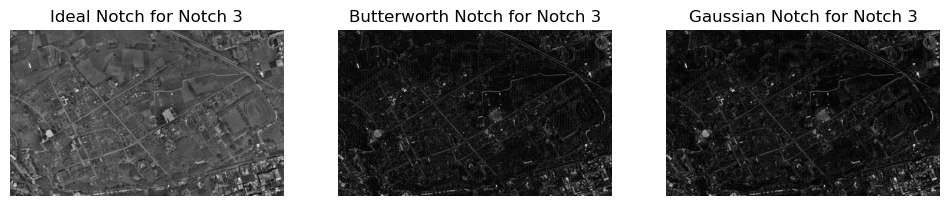

In [218]:
ptfig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Display each image on a separate subplot
axes[0].imshow(n3_fi, cmap='gray')
axes[0].set_title('Ideal Notch for Notch 3')
axes[0].axis('off')
axes[1].imshow(n3_fb, cmap='gray')
axes[1].set_title('Butterworth Notch for Notch 3')
axes[1].axis('off')
axes[2].imshow(n3_fg, cmap='gray')
axes[2].set_title('Gaussian Notch for Notch 3')
axes[2].axis('off')
plt.show()

Gaussian Notch gave good results for notch1 and nptch 2 while butterworth and gaussian notch darkend  the image in notch 3